##### Importing required modules


In [92]:
import numpy as np
import pandas as pd

creating a dataframe


In [93]:
data_farame = pd.read_csv("diabetes.csv")

checking heads of dataframe


In [94]:
data_farame.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


View the number of rows and columns of the dataframe


In [95]:
data_farame.shape

(768, 9)

Observe the number of healthy and sick individuals in the dataframe


In [96]:
data_farame["outcome"].value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

##### Display the data as a chart


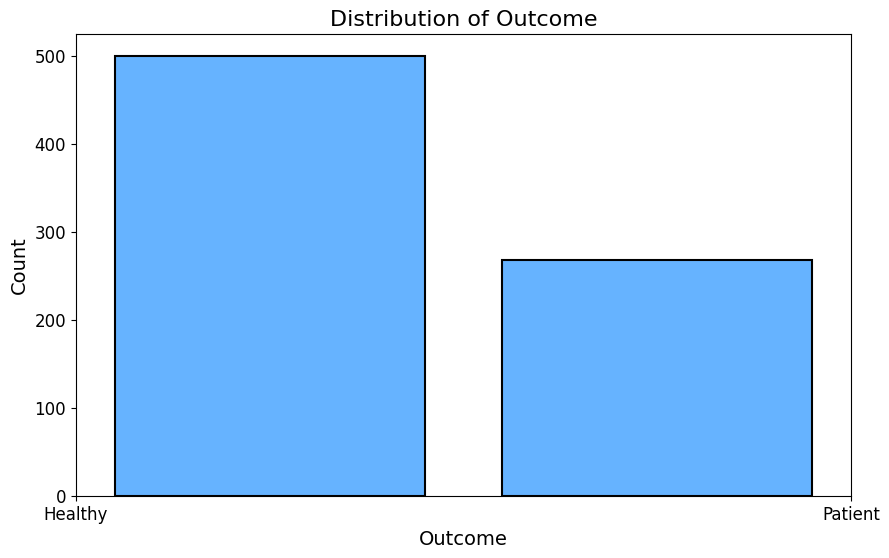

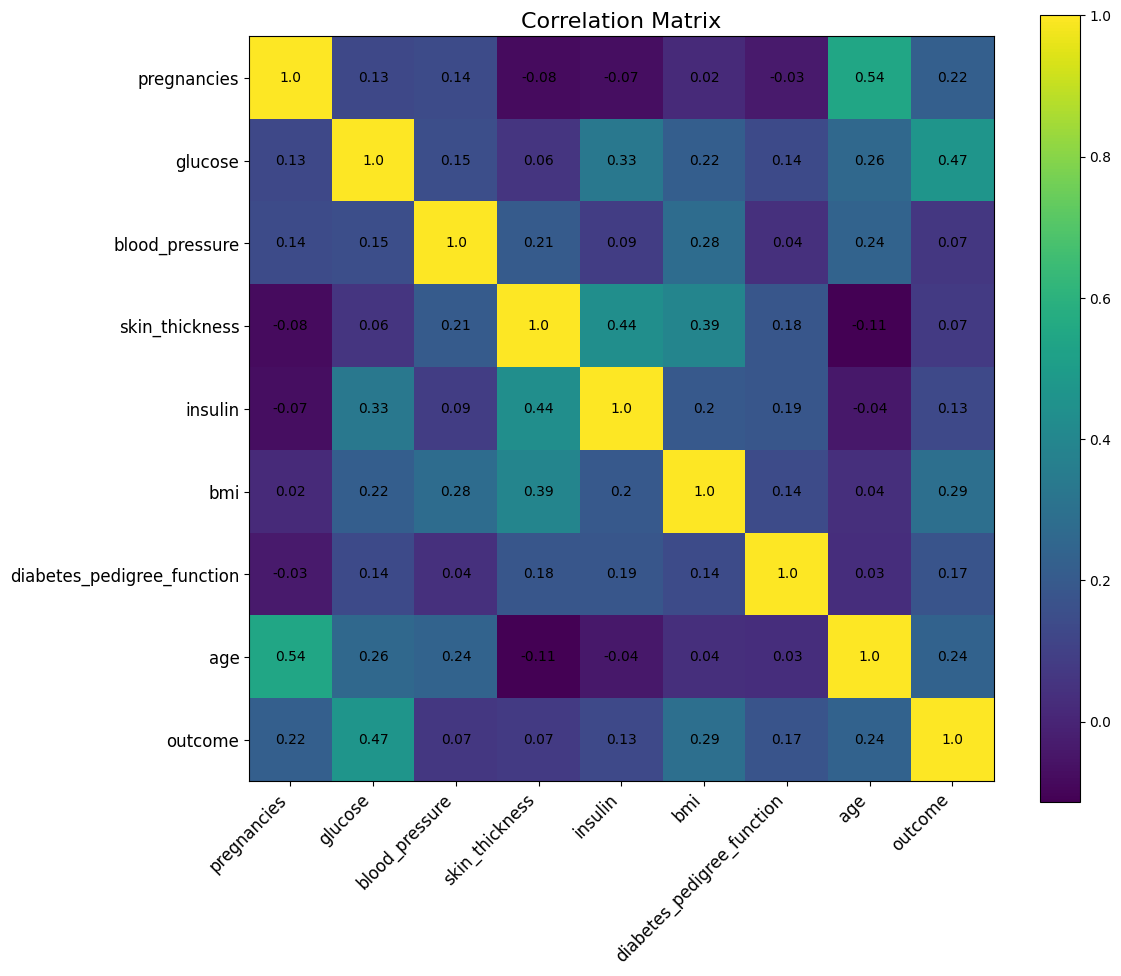

In [97]:
import matplotlib.pyplot as plt

# Plotting the distribution of outcome
plt.figure(figsize=(10, 6))
plt.hist(
    data_farame["outcome"],
    bins=2,
    rwidth=0.8,
    color="#66b3ff",
    edgecolor="black",
    linewidth=1.5,
)
plt.title("Distribution of Outcome", fontsize=16)
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["Healthy", "Patient"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = data_farame.corr()
plt.imshow(corr_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.xticks(
    range(len(corr_matrix.columns)),
    corr_matrix.columns,
    rotation=45,
    fontsize=12,
    ha="right",
)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=12)

# Adding correlation values as text in each cell
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(
            j,
            i,
            round(corr_matrix.iloc[i, j], 2),
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

##### Separating the label data from the features


In [98]:
x = data_farame.drop("outcome", axis=1)
y = data_farame["outcome"]

Presenting data as an array to the model


In [99]:
x = np.array(x)
y = np.array(y)

##### Normalizing training data


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

##### Training and testing the model


In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
x_train.shape, y_train.shape

((614, 8), (614,))

In [103]:
x_test.shape, y_test.shape

((154, 8), (154,))

##### Building the SVM model


In [104]:
from sklearn import svm
svm_model =  svm.SVC(kernel='linear') 
svm_model.fit(x_train, y_train) 

y_pred_train = svm_model.predict(x_train) 
y_pred_test = svm_model.predict(x_test) 

##### Evaluating the model's accuracy, precision, and recall


In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
prec = precision_score(y_test, y_pred_test)
reca = recall_score(y_test, y_pred_test)

acc_train, acc_test, prec, reca

(0.7671009771986971,
 0.8051948051948052,
 0.6944444444444444,
 0.5681818181818182)

##### Saving the model using joblib


In [106]:
import joblib

joblib.dump(scaler, './models/scaler.pkl')
joblib.dump(svm_model, './models/model.pkl')

['./models/model.pkl']